# DESCRIPTION

- Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

# Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

# Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

- Import a 311 NYC service request.
- Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
- Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
- Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
- Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?

In [697]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 60)

In [698]:
# Reading the CSV file

cs = pd.read_csv("311.csv")

cs.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [699]:
# Checking Number of rows and columns
cs.shape

(300698, 53)

In [700]:
# Checking the datatypes

cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [701]:
# Checking Describe

cs.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


# Data Cleaning and Manipulation

In [702]:
# Creating Function to find null value for dataframe

def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)


In [703]:
null_values(cs)

School or Citywide Complaint      100.00
Vehicle Type                      100.00
Taxi Company Borough              100.00
Taxi Pick Up Location             100.00
Garage Lot Name                   100.00
Ferry Direction                   100.00
Ferry Terminal Name               100.00
Road Ramp                          99.93
Bridge Highway Segment             99.93
Bridge Highway Name                99.92
Bridge Highway Direction           99.92
Landmark                           99.88
Intersection Street 2              85.58
Intersection Street 1              85.41
Cross Street 2                     16.55
Cross Street 1                     16.39
Street Name                        14.77
Incident Address                   14.77
Descriptor                          1.97
X Coordinate (State Plane)          1.18
Latitude                            1.18
Longitude                           1.18
Y Coordinate (State Plane)          1.18
Location                            1.18
Address Type    

In [704]:
# Dropping the columns with missing value percentage >85


cols = cs.columns

for i in cols:
    if((100*cs[i].isnull().sum()/len(cs.index)) >= 85):
        cs.drop(i, axis = 1, inplace = True)

In [705]:
cs.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [706]:
null_values(cs)

Cross Street 2                    16.55
Cross Street 1                    16.39
Incident Address                  14.77
Street Name                       14.77
Descriptor                         1.97
Location                           1.18
Longitude                          1.18
Latitude                           1.18
Y Coordinate (State Plane)         1.18
X Coordinate (State Plane)         1.18
Address Type                       0.94
Incident Zip                       0.87
City                               0.87
Resolution Action Updated Date     0.73
Facility Type                      0.72
Closed Date                        0.72
Location Type                      0.04
Due Date                           0.00
School Region                      0.00
School Zip                         0.00
School Code                        0.00
Agency                             0.00
School Not Found                   0.00
School State                       0.00
School City                        0.00


In [707]:
cs['Cross Street 2'].value_counts(dropna=False)

NaN                       49779
BEND                       4391
BROADWAY                   3784
8 AVENUE                   2766
DEAD END                   2144
                          ...  
TILSON PLACE                  1
BILLIOU STREET                1
LEGGETT PLACE                 1
STAPLE STREET                 1
SOUTH PINEHURST AVENUE        1
Name: Cross Street 2, Length: 5824, dtype: int64

In [708]:
# Dropping the columns with missing value percentage >13


cols = cs.columns

for i in cols:
    if((100*cs[i].isnull().sum()/len(cs.index)) >= 13):
        cs.drop(i, axis = 1, inplace = True)

In [709]:
null_values(cs)

Descriptor                        1.97
Location                          1.18
Y Coordinate (State Plane)        1.18
Longitude                         1.18
Latitude                          1.18
X Coordinate (State Plane)        1.18
Address Type                      0.94
Incident Zip                      0.87
City                              0.87
Resolution Action Updated Date    0.73
Facility Type                     0.72
Closed Date                       0.72
Location Type                     0.04
Due Date                          0.00
School Zip                        0.00
School Code                       0.00
School Region                     0.00
School Number                     0.00
School State                      0.00
School City                       0.00
School Address                    0.00
School Not Found                  0.00
School Phone Number               0.00
Unique Key                        0.00
School Name                       0.00
Park Borough             

In [710]:
cs.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [711]:
cs["Created Date"] = pd.to_datetime(cs['Created Date'])

In [712]:
cs["Closed Date"] = pd.to_datetime(cs['Closed Date'])

In [713]:
# Checking the format of Created Date and Closed Date
cs.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [714]:
# Checking the time elapsed between request creation and request closing
cs['Request_Closing_Time'] = cs["Closed Date"].values-cs["Created Date"].values
cs['Request_Closing_Time_min']= cs['Closed Date'].values-cs['Created Date'].values

In [715]:
cs.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,0 days 03:27:02


In [716]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Address Type                    297883 non-null  object         
 10  City                            298084 non-n

In [717]:
# Remove days from Request closing Time

cs['Request_Closing_Time'] = cs['Request_Closing_Time']/np.timedelta64(1, 'D')
cs['Request_Closing_Time_min'] = cs['Request_Closing_Time_min']/np.timedelta64(1,'m')

In [718]:
cs.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.038368,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0.059907,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0.202442,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0.323079,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0.143773,207.033333


In [719]:
# Check Percentage of each category available in "City"

cs.City.isnull().value_counts(normalize=True)*100

False    99.130689
True      0.869311
Name: City, dtype: float64

In [720]:
cs.City.value_counts(normalize=True)*100

BROOKLYN               32.979630
NEW YORK               22.139397
BRONX                  13.654540
STATEN ISLAND           4.140779
JAMAICA                 2.447632
ASTORIA                 2.123562
FLUSHING                2.003127
RIDGEWOOD               1.732062
CORONA                  1.440869
WOODSIDE                1.188927
SOUTH RICHMOND HILL     0.930610
OZONE PARK              0.924236
EAST ELMHURST           0.917191
ELMHURST                0.896727
WOODHAVEN               0.826613
MASPETH                 0.825942
LONG ISLAND CITY        0.817555
SOUTH OZONE PARK        0.728989
RICHMOND HILL           0.638746
FRESH MEADOWS           0.637069
QUEENS VILLAGE          0.608553
MIDDLE VILLAGE          0.592115
JACKSON HEIGHTS         0.566619
FOREST HILLS            0.566283
REGO PARK               0.498517
BAYSIDE                 0.409616
COLLEGE POINT           0.409281
FAR ROCKAWAY            0.395526
WHITESTONE              0.368353
HOLLIS                  0.339502
HOWARD BEA

In [721]:
cs['City'] = cs.City.fillna('Unknown')

In [722]:
cs.City.isnull().sum()

0

# Exploratory data analysis

In [723]:
#calculate the count of each Status category.

df2=cs.groupby(['City','Status']).size().unstack().fillna(0)


In [724]:
df2.sort_values(by = "Open", ascending = False).head()

Status,Assigned,Closed,Draft,Open
City,,,,
Unknown,734.0,506.0,0.0,1374.0
NEW YORK,15.0,65961.0,0.0,18.0
BROOKLYN,19.0,98275.0,1.0,12.0
JAMAICA,1.0,7286.0,0.0,9.0
STATEN ISLAND,2.0,12335.0,0.0,6.0


In [852]:
cs.Status.value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [853]:
cs.Status.value_counts(normalize=True)*100

Closed      99.259390
Open         0.478553
Assigned     0.261392
Draft        0.000665
Name: Status, dtype: float64

In [726]:
p_outlier_col = ['Incident Zip','Y Coordinate (State Plane)','Latitude','Longitude',
                 'Request_Closing_Time']



In [727]:
#plot the pie chart of response categories
pie = cs[(cs["Status"].isin(["Assigned","Open","Draft"]))]

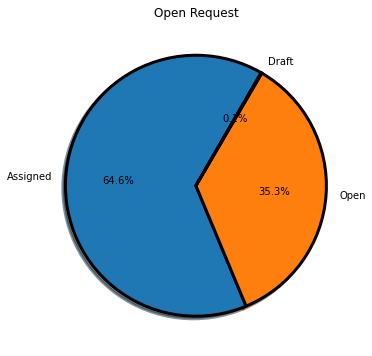

In [728]:
#plot the pie chart of Status categories
#pie.Status.value_counts(normalize=True).plot.pie()
# Checking for data imbalance
fig = plt.figure(figsize=(13,6))
plt.pie(pie['Status'].value_counts(normalize=True)*100,shadow =True,startangle = 60,
        labels = ["Assigned","Open","Draft"],autopct='%1.1f%%',
        wedgeprops={"linewidth":3,"edgecolor":"k"})
plt.title('Open Request')
plt.show()

In [729]:
cs.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_min'],
      dtype='object')

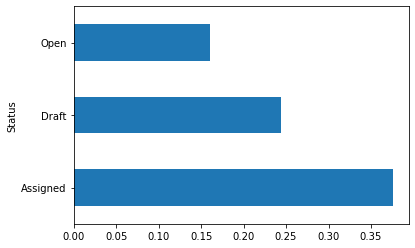

In [730]:
pie.groupby('Status')['Request_Closing_Time'].mean().plot.barh()
plt.show()

In [731]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Address Type                    297883 non-null  object        
 10  City                            300698 non-null  object 

In [732]:

cs['Complaint Type'].value_counts(normalize = True)*100

Blocked Driveway             25.621720
Illegal Parking              25.062022
Noise - Street/Sidewalk      16.166386
Noise - Commercial           11.831472
Derelict Vehicle              5.892291
Noise - Vehicle               5.681115
Animal Abuse                  2.586648
Traffic                       1.495853
Homeless Encampment           1.468583
Noise - Park                  1.344206
Vending                       1.264392
Drinking                      0.425676
Noise - House of Worship      0.309613
Posting Advertisement         0.216164
Urinating in Public           0.196875
Bike/Roller/Skate Chronic     0.142003
Panhandling                   0.102096
Disorderly Youth              0.095112
Illegal Fireworks             0.055870
Graffiti                      0.037579
Agency Issues                 0.001995
Squeegee                      0.001330
Ferry Complaint               0.000665
Animal in a Park              0.000333
Name: Complaint Type, dtype: float64

- 50% complained received from Blocked Driveway and Illegal parking

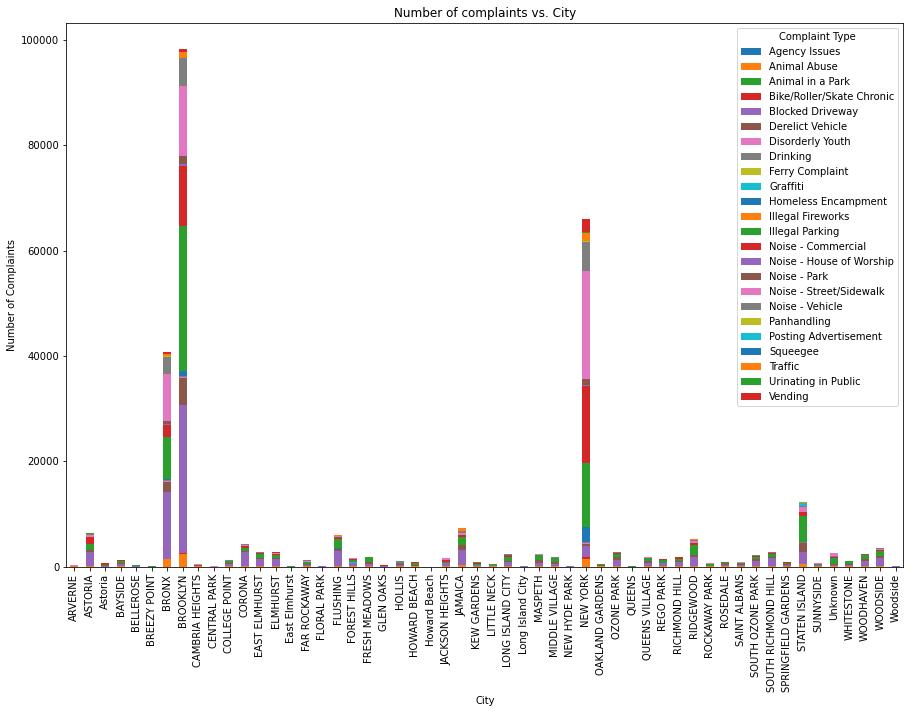

In [733]:
# Checking Maximum number of Complain against city

df3=cs.groupby(['City','Complaint Type']).size().unstack().fillna(0)
df3.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')
plt.show()

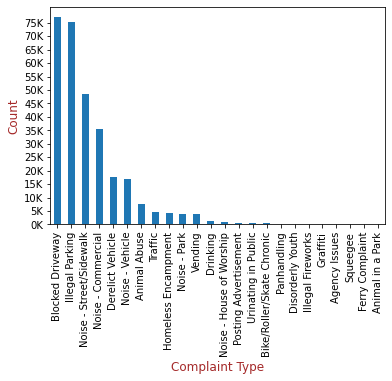

In [734]:
# Checking number of Complaint Types

cs["Complaint Type"].value_counts().plot.bar()
plt.xlabel("Complaint Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ticks = np.arange(1,80000,5000)
label = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,label)
plt.xticks(rotation = 90)
plt.show()

### Insight

- Hight Number of cases of "Blocked Driveway" and "Illegal Parking"

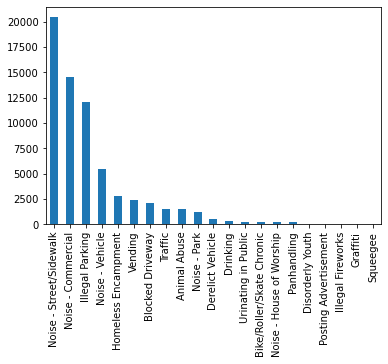

In [735]:
# Checking NEW YORK Maximum number of cases

cs.loc[(cs["City"]=="NEW YORK"),:]['Complaint Type'].value_counts().plot.bar()
plt.show()

- New York is hight number cases for "Noise Street/Sidewalk" 

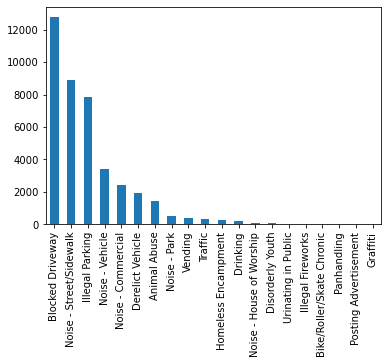

In [736]:
# Checking BRONX Maximum number of cases

cs.loc[(cs["City"]=="BRONX"),:]['Complaint Type'].value_counts().plot.bar()
plt.show()

- BRONX is high number cases for "Blocked Driveway " 

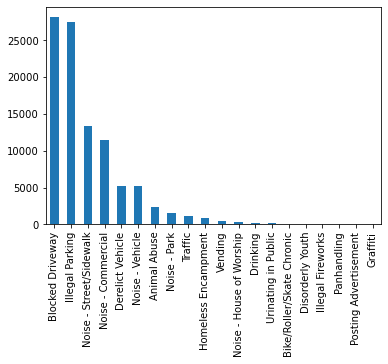

In [737]:
# Checking BROOKLYN Maximum number of cases

cs.loc[(cs["City"]=="BROOKLYN"),:]['Complaint Type'].value_counts().plot.bar()
plt.show()

- BROOKLYN is high number cases for "Blocked Driveway " 

In [738]:
cs.Request_Closing_Time.value_counts(normalize=True)*100

0.025000    0.164805
0.030556    0.158441
0.035417    0.158106
0.036806    0.156766
0.048611    0.156431
              ...   
0.686574    0.000335
0.481759    0.000335
0.498067    0.000335
0.364907    0.000335
0.685775    0.000335
Name: Request_Closing_Time, Length: 47608, dtype: float64

In [739]:
# Creating Number of ages cases
cs['Days_Bucket'] = pd.cut(cs['Request_Closing_Time'],[0,1,2,3,25],
                                   labels=["0 Days","1 Days","2 Days","3Above"])

In [740]:
(cs.Days_Bucket.value_counts(normalize=True)*100)

0 Days    98.768314
1 Days     1.013285
2 Days     0.147722
3Above     0.070679
Name: Days_Bucket, dtype: float64

- Insight
- 99% Complained has been resolved within a day

In [741]:
cs.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_min', 'Days_Bucket'],
      dtype='object')

In [742]:

Days_Status=cs.groupby(['Days_Bucket','Status']).size().unstack().fillna(0)

In [743]:
Days_Status.head()

Status,Assigned,Closed,Draft,Open
Days_Bucket,,,,
0 Days,25,294795,1,36
1 Days,1,3024,0,0
2 Days,0,441,0,0
3Above,0,211,0,0


In [744]:
# Checking Percentage to assigned Agency

cs["Agency Name"].value_counts(normalize=True)*100

New York City Police Department    99.997340
Internal Affairs Bureau             0.001995
NYPD                                0.000665
Name: Agency Name, dtype: float64

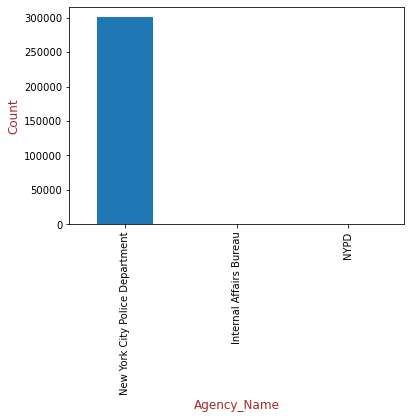

In [745]:
# Checking Agency Name Maximum number of cases

cs["Agency Name"].value_counts().plot.bar()
plt.xlabel("Agency_Name", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

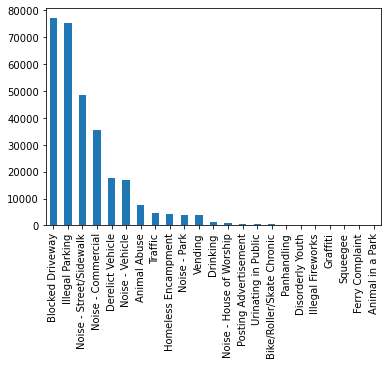

In [746]:
# Checking New York City Police Department Maximum number of cases

cs.loc[(cs["Agency Name"]=="New York City Police Department"),:]['Complaint Type'].value_counts().plot.bar()
plt.show()

- Maximum Number of case has been assigned to New York City Police Department
- Majority of the case Blocked Driveway, Illegal Parking and Noicse-Commercial

In [747]:
# Checking the Null value in Location Type
cs['Location Type'].isnull().sum()

131

In [748]:
# Checking number values assigned
cs["Location Type"].value_counts(normalize=True)*100

Street/Sidewalk               82.942905
Store/Commercial               6.780851
Club/Bar/Restaurant            5.775750
Residential Building/House     2.315623
Park/Playground                1.587999
House of Worship               0.309083
Residential Building           0.075524
Highway                        0.071531
Parking Lot                    0.038926
House and Store                0.030942
Vacant Lot                     0.025618
Commercial                     0.020628
Roadway Tunnel                 0.011645
Subway Station                 0.011312
Bridge                         0.000665
Ferry                          0.000333
Park                           0.000333
Terminal                       0.000333
Name: Location Type, dtype: float64

In [749]:
# Imputing the value Location Type

cs['Location Type'].fillna(value='Street/Sidewalk',inplace=True)

In [750]:
cs["Location Type"].value_counts(normalize=True)*100

Street/Sidewalk               82.950336
Store/Commercial               6.777897
Club/Bar/Restaurant            5.773234
Residential Building/House     2.314615
Park/Playground                1.587307
House of Worship               0.308948
Residential Building           0.075491
Highway                        0.071500
Parking Lot                    0.038909
House and Store                0.030928
Vacant Lot                     0.025607
Commercial                     0.020619
Roadway Tunnel                 0.011640
Subway Station                 0.011307
Bridge                         0.000665
Ferry                          0.000333
Park                           0.000333
Terminal                       0.000333
Name: Location Type, dtype: float64

- Approx 83% complained received from Street/Sidewalk

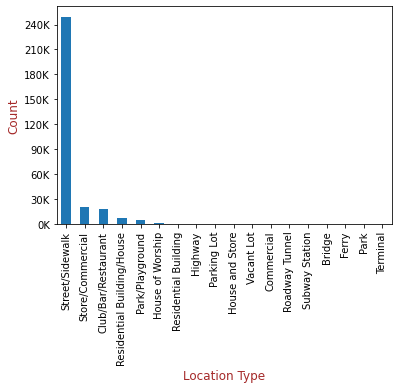

In [751]:
# Checking the graph visualization of Location Type

cs["Location Type"].value_counts().plot.bar()
plt.xlabel("Location Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ticks = np.arange(1,250000,30000)
label = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,label)
plt.xticks(rotation = 90)
plt.show()

In [752]:
# Checking  Major Type of complains

Top_complains = cs['Complaint Type'].value_counts().head(10)
Top_complains.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [753]:
# Checking Top Problem Areas

Top_complains

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

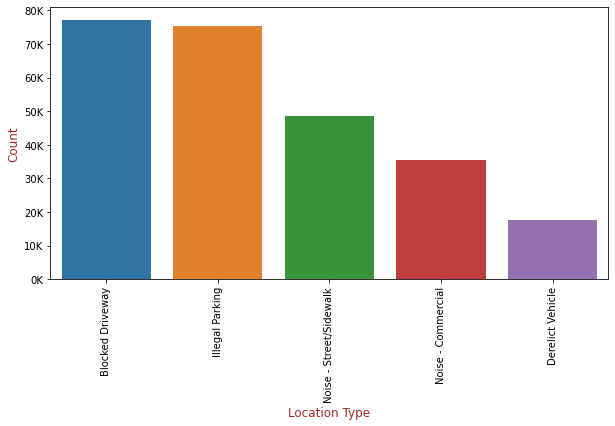

In [764]:
# Checking Complain Type in Graph for better Understanding

plt.figure(figsize=(10,5))

sns.barplot(x = Top_complains.nlargest().index, y= Top_complains.nlargest().values)
plt.xlabel("Location Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ticks = np.arange(1,90000,10000)
label = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks,label)
plt.xticks(rotation = 90)
plt.show()

In [758]:
# Checking Request_Closing_Time2 variable
cs.Request_Closing_Time_min.head()

0     55.250000
1     86.266667
2    291.516667
3    465.233333
4    207.033333
Name: Request_Closing_Time_min, dtype: float64

In [768]:
cs.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_min', 'Days_Bucket'],
      dtype='object')

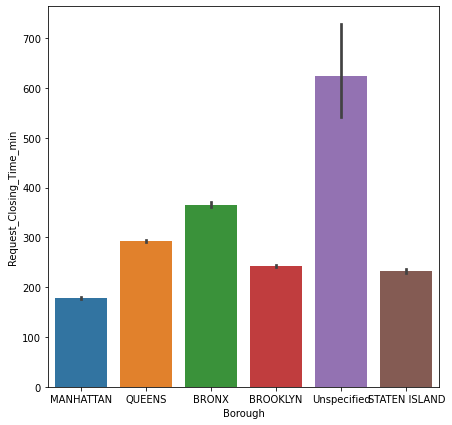

In [776]:
# Checking Average Resolving time Boroughs and Request_Closing_Time_min

plt.figure(figsize=(7,7))

sns.barplot(x="Borough",y='Request_Closing_Time_min', data=cs)

plt.show()

In [781]:
#Average Request Closing Time for various Compaints

c2=cs[['Complaint Type', 'Request_Closing_Time_min']]
compaints=c2.groupby('Complaint Type')['Request_Closing_Time_min'].mean().fillna(0).to_frame()

In [795]:
compaints.head()

,Request_Closing_Time_min
Complaint Type,
Agency Issues,315.619444
Animal Abuse,312.794630
Animal in a Park,20210.083333
Bike/Roller/Skate Chronic,225.987736
Blocked Driveway,284.454311


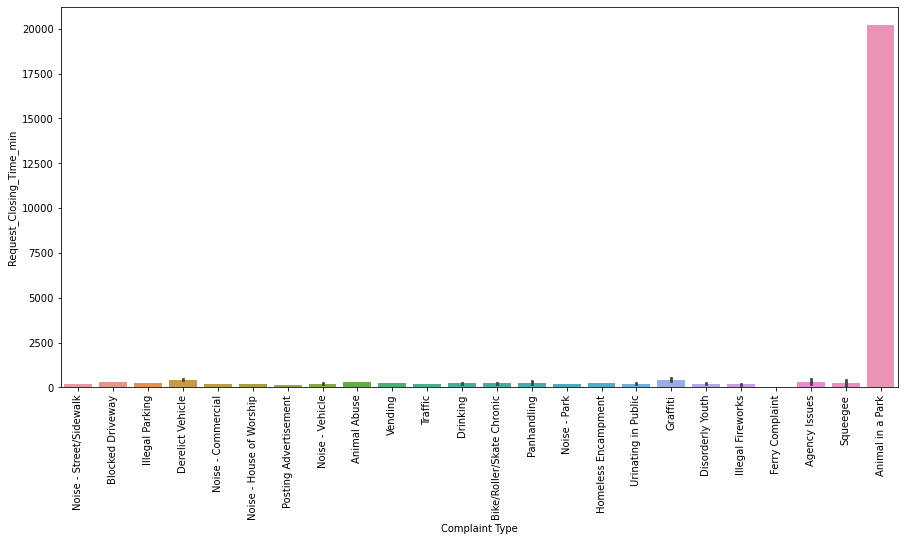

In [802]:
# Checking Average Resolving time Complaint Type and Request_Closing_Time_min
plt.figure(figsize=(15,7))

sns.barplot(x = "Complaint Type",y = 'Request_Closing_Time_min', data=c2)
plt.xticks(rotation=90)
plt.show()

In [804]:
# Checking comparision between City and Complaint Type

city_d = cs.groupby(['City','Complaint Type'])['Request_Closing_Time_min'].mean()
city_d.unstack().fillna(0).head()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.0,129.217544,0.0,0.000000,151.558095,178.093210,215.475000,14.316667,0.0,92.000000,108.887500,0.000000,138.981897,137.233333,93.731818,77.000000,119.543678,111.592857,62.0,0.0,0.0,0.000000,41.516667,29.000
ASTORIA,0.0,300.010133,0.0,104.358889,288.967068,581.354986,174.155556,283.345238,0.0,845.704167,295.055208,166.408333,290.003464,187.981748,121.333333,179.706557,207.069819,210.550572,69.0,352.2,0.0,324.610993,277.542593,296.125
Astoria,0.0,0.000000,0.0,0.000000,294.877730,374.169444,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,282.677387,212.513410,0.000000,0.000000,222.793860,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000
BAYSIDE,0.0,196.470721,0.0,0.000000,153.784306,201.586785,178.383333,114.000000,0.0,273.094444,172.533333,0.000000,153.760019,134.020000,212.091667,196.354167,91.860000,102.505208,0.0,0.0,0.0,91.616667,0.000000,112.675
BELLEROSE,0.0,763.480952,0.0,294.000000,605.964737,1030.088577,111.000000,235.083333,0.0,0.000000,2348.000000,400.000000,492.187579,404.446396,131.816667,84.850000,544.093590,154.990000,449.0,135.6,0.0,345.530952,452.483333,0.000


In [820]:
df8 = cs[cs["Request_Closing_Time_min"]<4000]

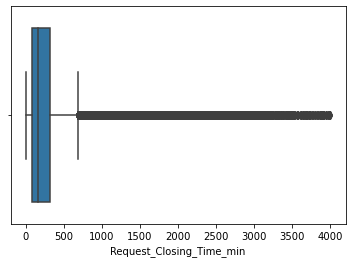

In [821]:
# Checking the outliers
sns.boxplot(df8["Request_Closing_Time_min"])
plt.show()

In [854]:

# Checking the Complaint Type again Time
df8['Complaint Type']=df8.index
plt.figure(figsize=(10,5))
sns.barplot(x='Complaint Type', y='Request_Closing_Time_min', data=df8.sort_values('Request_Closing_Time_min'))
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

# Histogram

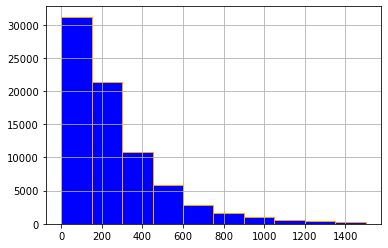

In [842]:
# Checking for Blocked Driveway and Complaint Type
df10= cs[cs['Complaint Type']== 'Blocked Driveway']['Request_Closing_Time_min']
df10.hist(range=(0,1500),edgecolor ="Orange", color="blue")
plt.show()

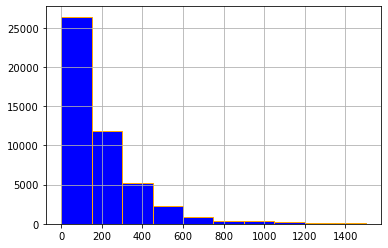

In [855]:
# Checking for Blocked Driveway and Complaint Type
df11= cs[cs['Complaint Type']== 'Noise - Street/Sidewalk']['Request_Closing_Time_min']
df11.hist(range=(0,1500),edgecolor ="Orange", color="blue")
plt.show()

In [830]:
cs.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_min', 'Days_Bucket'],
      dtype='object')

In [844]:
# Applying log transformation
dataset={}
for i in cs['Complaint Type'].unique():
    dataset[i]= np.log(cs[cs['Complaint Type']==i]['Request_Closing_Time_min'])

<AxesSubplot:>

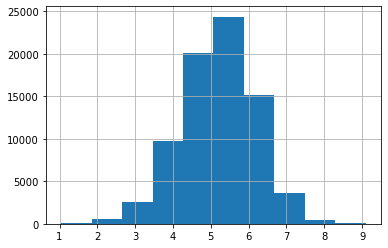

In [846]:
dataset['Blocked Driveway'].hist()

<AxesSubplot:>

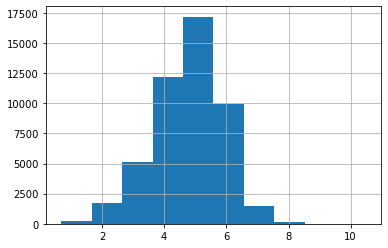

In [850]:
dataset['Noise - Street/Sidewalk'].hist()

In [858]:
# Checking for Null Hypothesis and Alternate Hypothesis


from scipy.stats import f_oneway
stat,p = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'], 
                dataset['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


# Conclusion

1. 99% Complaint has been closed and rest of the 1 % complain is belong to "Open", "Assigned" and "Draft".
2. Important available where we have maximum number of complains. it is contributing almost 82% of complainst 
   Blocked Driveway             25.62%
   Illegal Parking              25.0%
   Noise - Street/Sidewalk      16.1%
   Noise - Commercial           11.83%
   Derelict Vehicle              5.89%
3. Maximum Number of case has been assigned to New York City Police Department
4. Majority of the case Blocked Driveway, Illegal Parking and Noicse-Commercial
5. New York is high number cases for "Noise Street/Sidewalk"
6. BRONX is high number cases for "Blocked Driveway "
7. BROOKLYN is high number cases for "Blocked Driveway "
8. Approx 83% complained received from Street/Sidewalk
9. Lots of time is taking on Animal in a Park

### Hypothesis Testing
- The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing size
- Taken four variable i.e Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial. Derelict Vehicle.
- Using from scipy.stats import f_oneway library to perform it. 
- If the p-value is less than or equal to the specified significance level α, the null hypothesis is rejected; otherwise, the null hypothesis is not rejected. In other words, if p≤α, reject H0; otherwise, if p>α do not reject H0.
- Result is Null hypothesis is rejected which conclude that it is significance level.

**Question**
Whether the average response time across complaint types is similar or not (overall): Yes it is similar
Are the type of complaint or service requested and location related?: Yes, it is location relation because New York is high number cases for "Noise Street/Sidewalk"

**Improvement Proposal**
- There are high number of Open and Assigned case where we don't have City name due to which we have few open cases.
- Suggestion: while logging the complaint, we need to make sure, city name should available due to which police can reached on specific location and control the situation.
- One variable is impacting the overall resolution lead time i.e "Animal at Park". We need to inform concern team and ask to improve the perfromance on that variable.
